In [24]:
# import custom modules wrote by julio
import seaborn as sns
import pandas as pd
RANDOM_STATE = 42; # for reproducibility
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('./data/I-SPY_1_clean_data.csv')
df.columns

Index(['SUBJECTID', 'age', 'White', 'ER+', 'PR+', 'HR+', 'Bilateral',
       'Right_Breast', 'MRI_LD_Baseline', 'MRI_LD_1_3dAC', 'MRI_LD_Int_Reg',
       'MRI_LD_PreSurg', 'Alive', 'Survival_length', 'RFS', 'RFS_code', 'PCR',
       'RCB'],
      dtype='object')

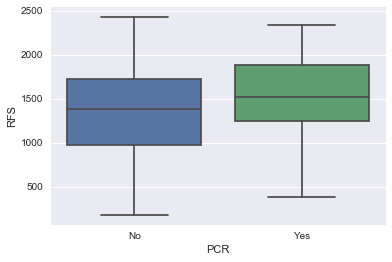

In [26]:
sns.boxplot(x='PCR', y='RFS', hue=None, data=df)

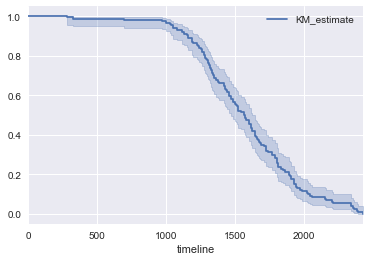

In [28]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

time_to_event = 'Survival_length'
event = 'Alive'

mydf = df[[time_to_event,event]]
mydf.columns = ['T','E']

T = mydf['T']
E = pd.get_dummies(mydf['E'])['Yes']

kmf = KaplanMeierFitter();
kmf.fit(T, E);

kmf.survival_function_
kmf.median_
kmf.plot()

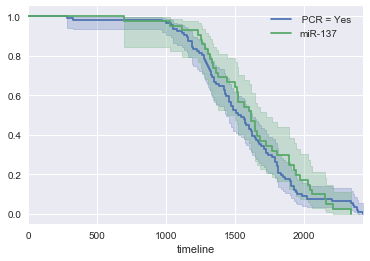

In [13]:
groups = df['PCR']
ix = (groups == 'Yes')

kmf.fit(T[~ix], E[~ix], label=' PCR = Yes ')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='miR-137')
kmf.plot(ax=ax)

In [ ]:
T = mydf['Survival_length']/12;
E = pd.get_dummies(df['PCR'])['Yes'];
T = T[df.RFS_code == 1]

groups = mydf['PCR']
ix = (groups == 'Yes')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='miR-137')
kmf.plot(ax=ax)

In [32]:
from lifelines.datasets import load_waltons
walt = load_waltons() 
walt.head(3)


,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137


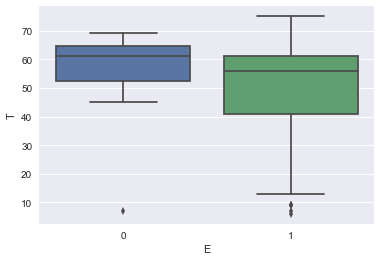

In [33]:
sns.boxplot(x='E', y='T', hue=None, data=walt)

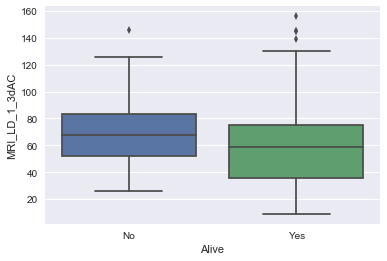

In [34]:
sns.boxplot(x='Alive', y='MRI_LD_1_3dAC', hue=None, data=df)

In [38]:
df[df.Alive=='No']['MRI_LD_1_3dAC'].median()

68.0